In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
df = pd.read_csv('data/inv_listing_1705')

df_1 = pd.read_csv('data/inv_listing_17051905')
df_2 = pd.read_csv('data/inv_listing_20052305')
df_3 = pd.read_csv('data/inv_listing_24052605')
df_4 = pd.read_csv('data/inv_listing_27052805')
df_5 = pd.read_csv('data/inv_listing_30053105')


In [4]:
df_sn = pd.read_csv('data/listing_snapshot_marchapril')
df_sn_1 = pd.read_csv('data/listing_snapshot_janfeb')
df_sn_2 = pd.read_csv('data/listing_snapshot_may')
df_sn_3 = pd.read_csv('data/listing_snapshot_novdec')
df_sn_4 = pd.read_csv('data/listing_snapshot_sepoct')
df_sn_5 = pd.read_csv('data/listing_snapshot_janapr2020')
df_sn_6 = pd.read_csv('data/listing_snapshot_mayaug2020')
df_sn_7 = pd.read_csv('data/listing_snapshot_sepdec2019')

In [5]:
df = pd.concat([df, df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [9]:
df_snn = pd.concat([df_sn_4, df_sn_3, df_sn_1, df_sn, df_sn_2, df_sn_5, df_sn_6], ignore_index=True)

Let's take a look at the most popular models in our inventory

In [53]:
df.groupby(['model_key'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(20)

,model_key,id
620,golf,69585
98,3er,42120
880,octavia,33171
310,c-klasse,27973
920,polo,27065
139,5er,24204
198,a4,23681
905,passat,22454
124,500,21704
191,a-klasse,21259


In [5]:
df_s = pd.read_csv('searches')

In [13]:
df_snn = pd.concat([df_sn_4, df_sn_3, df_sn_1, df_sn, df_sn_2], ignore_index=True)

In [17]:
df_snn['leads_total'] = df_snn['no_of_message_leads'] + df_snn['no_of_ga_call_leads'] 

In [6]:
df_ = df[pd.to_datetime(df.created_date)>=pd.to_datetime('2019-09-01')][['id', 'make_key', 'model_key','source',
                                                                         'inv_dealer_id','created_date', 'deactivation_date', 
                                                                         'mileage', 'horse_power', 'price', 'fuel_type']]

In [10]:
df_mm = pd.merge(df_, df_snn, left_on='id', right_on = 'original_listing_id')

In [8]:
df_.count()

id                   1686619
make_key             1651398
model_key            1651398
source               1686619
inv_dealer_id        1686619
created_date         1686619
deactivation_date    1457154
mileage              1685614
horse_power          1658230
price                1685943
fuel_type            1660318
dtype: int64

In [18]:
df_m = pd.merge(df_, df_snn, left_on='id', right_on='original_listing_id')

Plots for all golfs, golfs with less than 50000 mileage, <100000 mileage, <200000 mileage

In [48]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_golf = []
leads_golf_50000 = []
leads_golf_100000 = []
leads_golf_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_golf.append(h[(h.model_key=='golf')].leads_total.sum())
    leads_golf_50000.append(h[(h.model_key=='golf')&(h.mileage<50000)].leads_total.sum())
    leads_golf_100000.append(h[(h.model_key=='golf')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_golf_200000.append(h[(h.model_key=='golf')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates,'leads_golf':leads_golf, 
                     'leads_golf_50000': leads_golf_50000, 'leads_golf_100000': leads_golf_100000, 
                      'leads_golf_200000':leads_golf_200000})


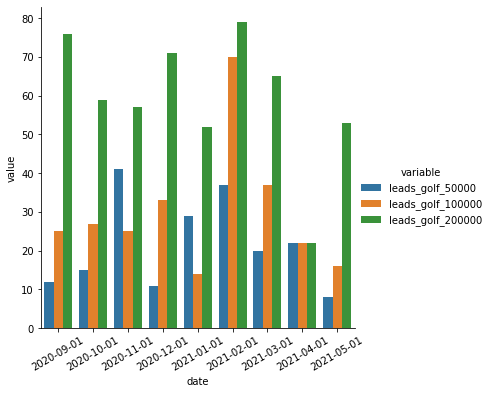

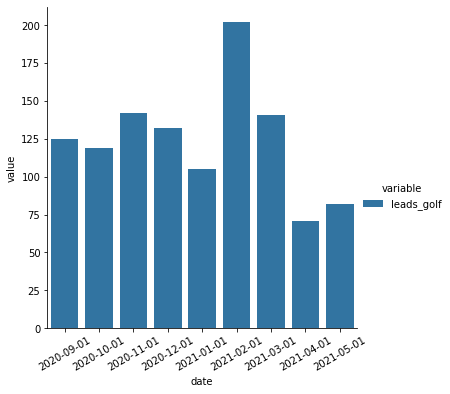

In [49]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_golf_50000', 'leads_golf_100000', 'leads_golf_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_golf']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

the same plots for octavias

In [50]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_oct = []
leads_oct_50000 = []
leads_oct_100000 = []
leads_oct_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_oct.append(h[(h.model_key=='octavia')].leads_total.sum())
    leads_oct_50000.append(h[(h.model_key=='octavia')&(h.mileage<50000)].leads_total.sum())
    leads_oct_100000.append(h[(h.model_key=='octavia')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_oct_200000.append(h[(h.model_key=='octavia')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_oct': leads_oct,
                     'leads_oct_50000': leads_oct_50000, 'leads_oct_100000': leads_oct_100000, 
                      'leads_oct_200000':leads_oct_200000})

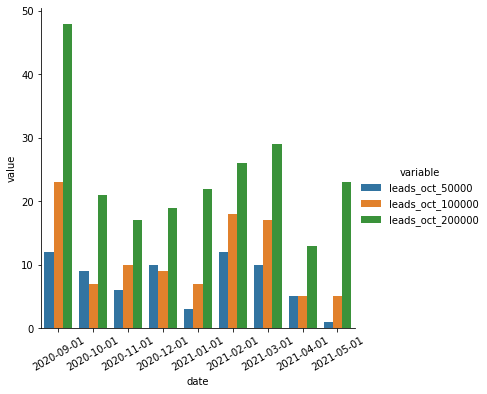

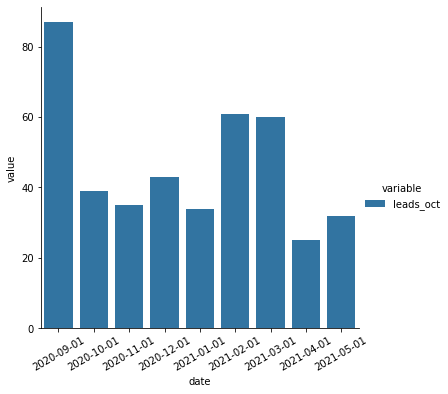

In [51]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_oct_50000', 'leads_oct_100000', 'leads_oct_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_oct']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

the same plots for bmw 3er

In [54]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_3er = []
leads_3er_50000 = []
leads_3er_100000 = []
leads_3er_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_3er.append(h[(h.model_key=='3er')].leads_total.sum())
    leads_3er_50000.append(h[(h.model_key=='3er')&(h.mileage<50000)].leads_total.sum())
    leads_3er_100000.append(h[(h.model_key=='3er')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_3er_200000.append(h[(h.model_key=='3er')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_3er': leads_3er,
                     'leads_3er_50000': leads_3er_50000, 'leads_3er_100000': leads_3er_100000, 
                      'leads_3er_200000':leads_3er_200000})

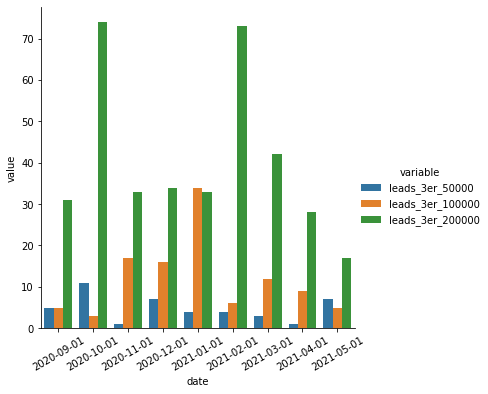

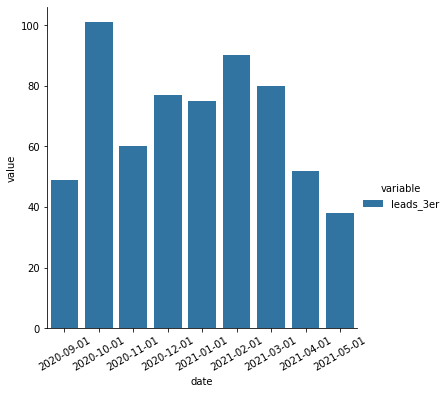

In [55]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_3er_50000', 'leads_3er_100000', 'leads_3er_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_3er']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

the same plots for vw polo

In [56]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_polo = []
leads_polo_50000 = []
leads_polo_100000 = []
leads_polo_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_polo.append(h[(h.model_key=='polo')].leads_total.sum())
    leads_polo_50000.append(h[(h.model_key=='polo')&(h.mileage<50000)].leads_total.sum())
    leads_polo_100000.append(h[(h.model_key=='polo')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_polo_200000.append(h[(h.model_key=='polo')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_polo': leads_polo,
                     'leads_polo_50000': leads_polo_50000, 'leads_polo_100000': leads_polo_100000, 
                      'leads_polo_200000':leads_polo_200000})

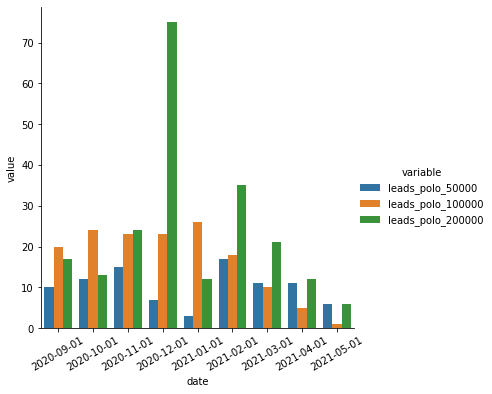

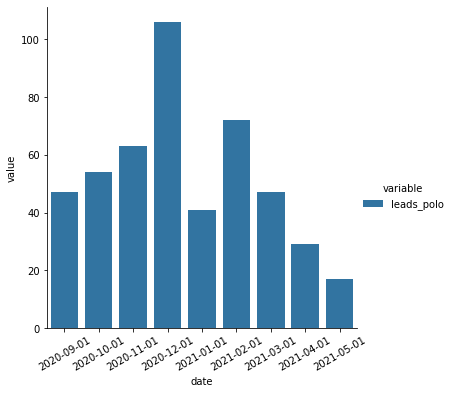

In [57]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_polo_50000', 'leads_polo_100000', 'leads_polo_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_polo']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

mercedes-benz c-klasse

In [58]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_ckl = []
leads_ckl_50000 = []
leads_ckl_100000 = []
leads_ckl_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_ckl.append(h[(h.model_key=='c-klasse')].leads_total.sum())
    leads_ckl_50000.append(h[(h.model_key=='c-klasse')&(h.mileage<50000)].leads_total.sum())
    leads_ckl_100000.append(h[(h.model_key=='c-klasse')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_ckl_200000.append(h[(h.model_key=='c-klasse')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_ckl': leads_ckl,
                     'leads_ckl_50000': leads_ckl_50000, 'leads_ckl_100000': leads_ckl_100000, 
                      'leads_ckl_200000':leads_ckl_200000})

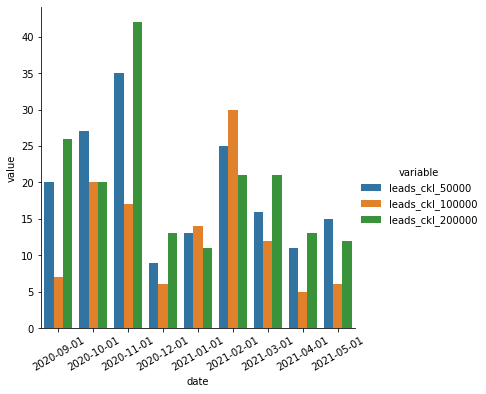

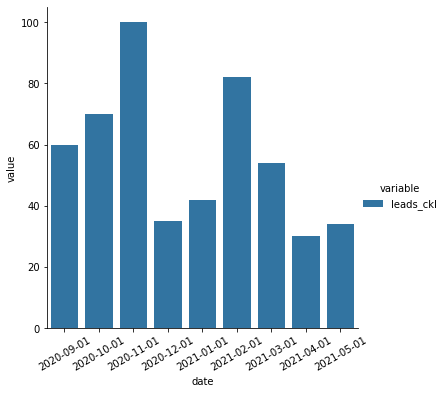

In [59]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_ckl_50000', 'leads_ckl_100000', 'leads_ckl_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_ckl']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

fiat 500

In [60]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_f500 = []
leads_f500_50000 = []
leads_f500_100000 = []
leads_f500_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_f500.append(h[(h.model_key=='500')].leads_total.sum())
    leads_f500_50000.append(h[(h.model_key=='500')&(h.mileage<50000)].leads_total.sum())
    leads_f500_100000.append(h[(h.model_key=='500')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_f500_200000.append(h[(h.model_key=='500')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_f500': leads_f500,
                     'leads_f500_50000': leads_f500_50000, 'leads_f500_100000': leads_f500_100000, 
                      'leads_f500_200000':leads_f500_200000})

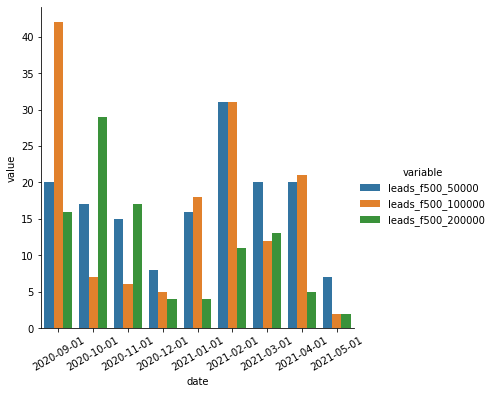

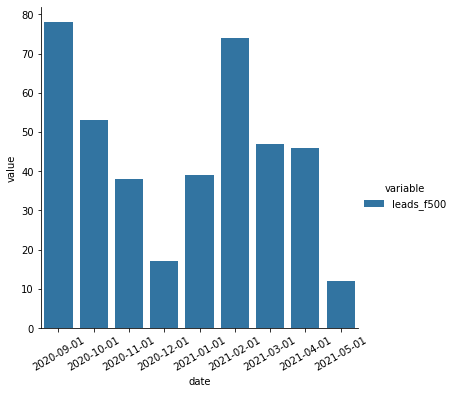

In [61]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_f500_50000', 'leads_f500_100000', 'leads_f500_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_f500']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

on the make level - for vw

In [62]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_vw = []
leads_vw_50000 = []
leads_vw_100000 = []
leads_vw_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_vw.append(h[(h.make_key=='vw')].leads_total.sum())
    leads_vw_50000.append(h[(h.make_key=='vw')&(h.mileage<50000)].leads_total.sum())
    leads_vw_100000.append(h[(h.make_key=='vw')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_vw_200000.append(h[(h.make_key=='vw')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_vw': leads_vw,
                     'leads_vw_50000': leads_vw_50000, 'leads_vw_100000': leads_vw_100000, 
                      'leads_vw_200000':leads_vw_200000})

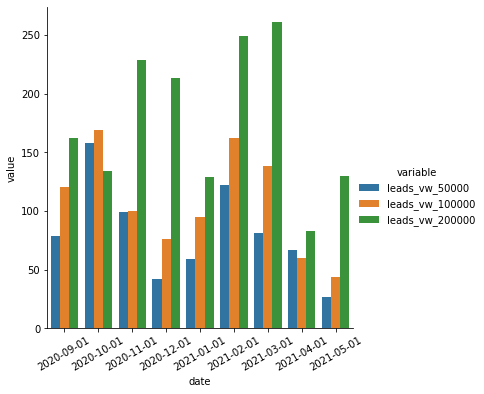

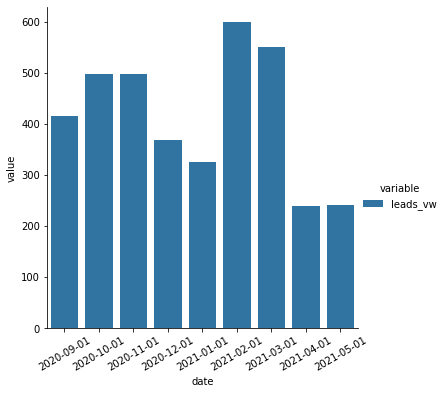

In [63]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_vw_50000', 'leads_vw_100000', 'leads_vw_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_vw']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

for bmw

In [64]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_bmw = []
leads_bmw_50000 = []
leads_bmw_100000 = []
leads_bmw_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_bmw.append(h[(h.make_key=='bmw')].leads_total.sum())
    leads_bmw_50000.append(h[(h.make_key=='bmw')&(h.mileage<50000)].leads_total.sum())
    leads_bmw_100000.append(h[(h.make_key=='bmw')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_bmw_200000.append(h[(h.make_key=='bmw')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_bmw': leads_bmw,
                     'leads_bmw_50000': leads_bmw_50000, 'leads_bmw_100000': leads_bmw_100000, 
                      'leads_bmw_200000':leads_bmw_200000})

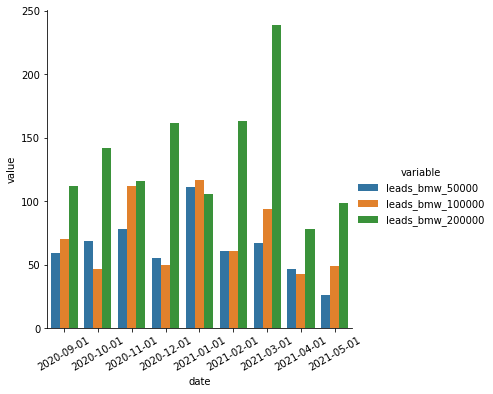

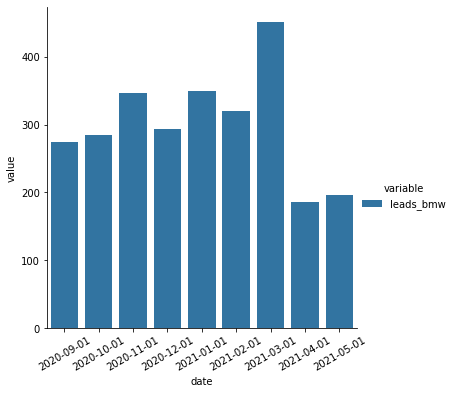

In [65]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_bmw_50000', 'leads_bmw_100000', 'leads_bmw_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_bmw']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

for opel

In [66]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_opel = []
leads_opel_50000 = []
leads_opel_100000 = []
leads_opel_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_opel.append(h[(h.make_key=='opel')].leads_total.sum())
    leads_opel_50000.append(h[(h.make_key=='opel')&(h.mileage<50000)].leads_total.sum())
    leads_opel_100000.append(h[(h.make_key=='opel')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_opel_200000.append(h[(h.make_key=='opel')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_opel': leads_opel,
                     'leads_opel_50000': leads_opel_50000, 'leads_opel_100000': leads_opel_100000, 
                      'leads_opel_200000':leads_opel_200000})

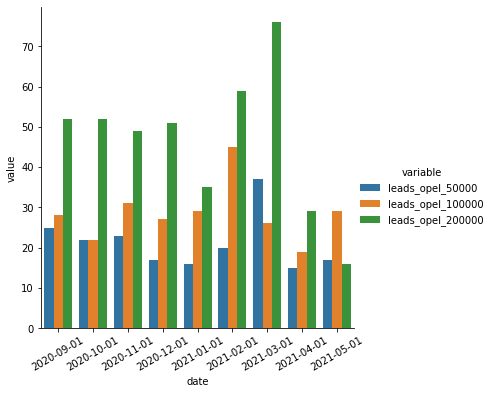

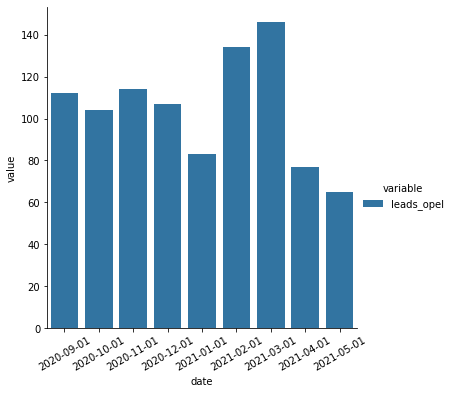

In [67]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_opel_50000', 'leads_opel_100000', 'leads_opel_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_opel']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

porsche

In [68]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_porsche = []
leads_porsche_50000 = []
leads_porsche_100000 = []
leads_porsche_200000 = []
for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_porsche.append(h[(h.make_key=='porsche')].leads_total.sum())
    leads_porsche_50000.append(h[(h.make_key=='porsche')&(h.mileage<50000)].leads_total.sum())
    leads_porsche_100000.append(h[(h.make_key=='porsche')&(h.mileage>=50000)&(h.mileage<100000)].leads_total.sum())
    leads_porsche_200000.append(h[(h.make_key=='porsche')&(h.mileage>=100000)&(h.mileage<200000)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_porsche': leads_porsche,
                     'leads_porsche_50000': leads_porsche_50000, 'leads_porsche_100000': leads_porsche_100000, 
                      'leads_porsche_200000':leads_porsche_200000})

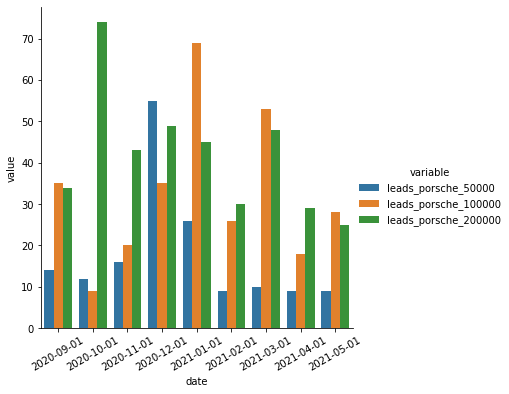

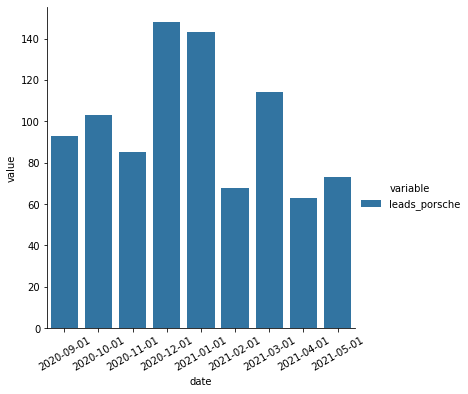

In [69]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_porsche_50000', 'leads_porsche_100000', 'leads_porsche_200000']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_porsche']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);

split by fuel_type

In [141]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_electric = []
leads_petrol = []
leads_diesel = []

for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_electric.append(h[(h.fuel_type=='electric')].leads_total.sum())
    leads_petrol.append(h[(h.fuel_type=='petrol')].leads_total.sum())
    leads_diesel.append(h[(h.fuel_type=='diesel')].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_electric': leads_electric,
                     'leads_petrol': leads_petrol, 
                      'leads_diesel':leads_diesel})

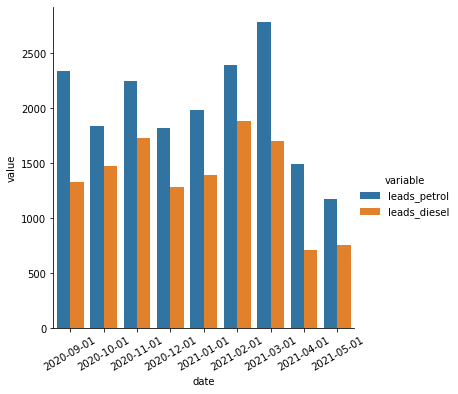

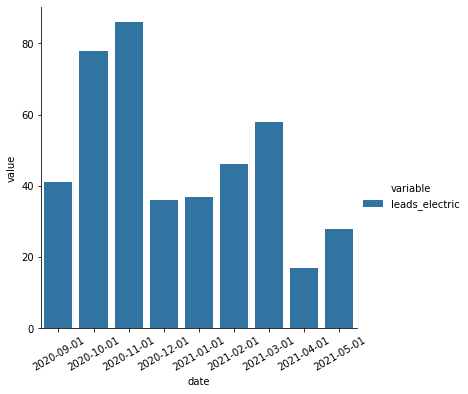

In [142]:
sns.catplot(data =pd.melt(df_av[['date', 'leads_petrol', 'leads_diesel']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);
sns.catplot(data =pd.melt(df_av[['date', 'leads_electric']], ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);


split by horse_power (<100ps, 100 to 150, 150 to 200, more than 200)

In [82]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_hp100 = []
leads_hp150 = []
leads_hp200 = []
leads_hpm200 = []

for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_hp100.append(h[(h.horse_power<100)].leads_total.sum())
    leads_hp150.append(h[(h.horse_power>=100)&(h.horse_power<150)].leads_total.sum())
    leads_hp200.append(h[(h.horse_power>=150)&(h.horse_power<200)].leads_total.sum())
    leads_hpm200.append(h[(h.horse_power>=200)].leads_total.sum())
df_av = pd.DataFrame({'date':dates, 'leads_hp100': leads_hp100,
                     'leads_hp150': leads_hp150, 
                      'leads_hp200':leads_hp200, 
                     'leads_hpm200': leads_hpm200})

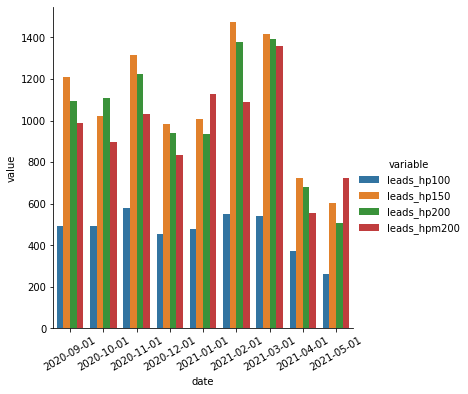

In [83]:
sns.catplot(data =pd.melt(df_av, ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);


Let's take a look at the list of dealers who published more listings as of September 2020 and then we'll look at the following months/amount of published inventory by those dealers

In [9]:
date = '2019-09-01'
h = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
d_lst = set(h[h.source.isin(['MANUAL', 'DEALER_PLATFORM'])].groupby(['inv_dealer_id'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(10).inv_dealer_id)
d_lst

{1019, 1056, 1123, 1581, 1622, 1963, 1996, 100947, 101912, 102905}

In [101]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
inv_1015 = []
inv_1056 = []
inv_1123 = []
inv_1134 = []
inv_1581 = []
inv_1582 = []
inv_100430 = []
inv_101620 = []
inv_102724 = []
inv_102905 = []


for date in dates:
    #h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
     #       (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    h = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    inv_1015.append(h[h.inv_dealer_id==1015].id.count())
    inv_1056.append(h[h.inv_dealer_id==1056].id.count())
    inv_1123.append(h[h.inv_dealer_id==1123].id.count())
    inv_1134.append(h[h.inv_dealer_id==1134].id.count())
    inv_1581.append(h[h.inv_dealer_id==1581].id.count())
    inv_1582.append(h[h.inv_dealer_id==1582].id.count())
    inv_100430.append(h[h.inv_dealer_id==100430].id.count())
    inv_101620.append(h[h.inv_dealer_id==101620].id.count())
    inv_102724.append(h[h.inv_dealer_id==102724].id.count())
    inv_102905.append(h[h.inv_dealer_id==102905].id.count())

df_d = pd.DataFrame({'date':dates, 'inv_1015':inv_1015,
                     'inv_1056':inv_1056, 
                     'inv_1123':inv_1123, 
                     'inv_1134':inv_1134, 
                        'inv_1581':inv_1581, 
                     'inv_1582':inv_1582, 
                     'inv_100430':inv_100430, 
                     'inv_101620':inv_101620,
                    'inv_102724':inv_102724, 
                     'inv_102905':inv_102905})

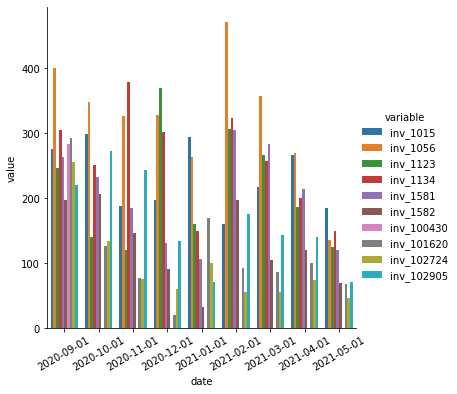

In [102]:
sns.catplot(data =pd.melt(df_d, ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);


Let's compare the top-10 make/models, average mileage and price for the inventory from this dealers list as of Sep 20 vs May 21

In [146]:
date = '2020-09-01'
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].groupby(['model_key'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(10)

,model_key,id
34,alhambra,76
181,octavia,76
159,leon,63
118,golf,63
11,3er,47
121,grand-cherokee,45
14,500,44
18,5er,43
257,touran,41
253,tiguan,40


In [147]:
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].mileage.median()


11000.0

In [148]:
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].price.median()

27690.0

In [150]:
date = '2021-05-01'
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].groupby(['model_key'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(10)

,model_key,id
141,octavia,36
103,i30,27
145,passat,24
115,kamiq,23
125,leon,22
92,golf,19
21,a4,18
185,sx4,18
80,fabia,17
16,5er,16


In [151]:
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].mileage.median()


27000.0

In [152]:
df_[df_.inv_dealer_id.isin(d_lst)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].price.median()

24550.0

Let's make the same analysis for leads: 
top-10 dealers generating more leads as of Sep 2020 and the trend for the following months

In [19]:
date = '2019-09-01'
h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
         (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
d_lstl = set(h[h.source.isin(['MANUAL', 'DEALER_PLATFORM'])].groupby(['inv_dealer_id'])['leads_total'].sum().reset_index().sort_values(by='leads_total', ascending = False).head(10).inv_dealer_id)
d_lstl

set()

In [154]:
dates = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
         '2021-04-01', '2021-05-01']
leads_1056 = []
leads_1058 = []
leads_1123 = []
leads_1134 = []
leads_1960 = []
leads_100013 = []
leads_102232 = []
leads_103053 = []
leads_107686 = []
leads_246417 = []


for date in dates:
    h = df_m[(pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&
            (pd.to_datetime(df_m.date)<=pd.to_datetime(date)+timedelta(days=30))]
    #h = df_[(pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))]
    leads_1056.append(h[h.inv_dealer_id==1056].leads_total.sum())
    leads_1058.append(h[h.inv_dealer_id==1058].leads_total.sum())
    leads_1123.append(h[h.inv_dealer_id==1123].leads_total.sum())
    leads_1134.append(h[h.inv_dealer_id==1134].leads_total.sum())
    leads_1960.append(h[h.inv_dealer_id==1960].leads_total.sum())
    leads_100013.append(h[h.inv_dealer_id==100013].leads_total.sum())
    leads_102232.append(h[h.inv_dealer_id==102232].leads_total.sum())
    leads_103053.append(h[h.inv_dealer_id==103053].leads_total.sum())
    leads_107686.append(h[h.inv_dealer_id==107686].leads_total.sum())
    leads_246417.append(h[h.inv_dealer_id==246417].leads_total.sum())

df_d = pd.DataFrame({'date':dates, 
                     'leads_1056':leads_1056, 
                     'leads_1058':leads_1058, 
                     'leads_1123':leads_1123, 
                     'leads_1134':leads_1134, 
                        'leads_1960':leads_1960, 
                     'leads_100013':leads_100013, 
                     'leads_102232':leads_102232, 
                     'leads_103053':leads_103053,
                    'leads_107686':leads_107686, 
                     'leads_246417':leads_246417})

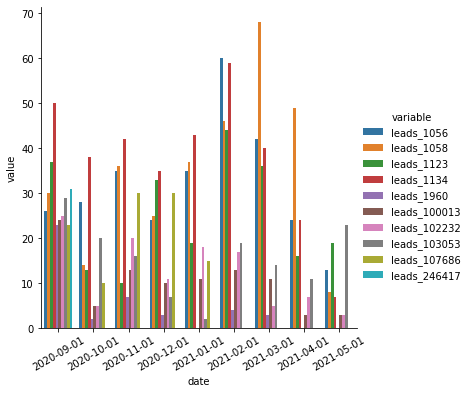

In [155]:
sns.catplot(data =pd.melt(df_d, ['date']), x = 'date', y='value', hue = 'variable', kind = 'bar').set_xticklabels(rotation=30);


In [132]:
date = '2020-09-01'
df_[df_.inv_dealer_id.isin(d_lstl)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].groupby(['model_key'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(10)

,model_key,id
153,octavia,62
11,3er,51
106,golf,50
18,5er,40
27,a4,31
108,grand-cherokee,30
159,passat,25
209,touran,24
234,x5,24
236,xc60,23


In [133]:
df_[df_.inv_dealer_id.isin(d_lstl)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].mileage.median()

124000.0

In [134]:
df_[df_.inv_dealer_id.isin(d_lstl)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].price.median()

14500.0

In [136]:
date = '2021-05-01'
df_[df_.inv_dealer_id.isin(d_lstl)&
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].groupby(['model_key'])['id'].count().reset_index().sort_values(by='id', ascending = False).head(10)

,model_key,id
73,golf,17
112,passat,16
108,octavia,15
16,5er,14
11,3er,13
21,a4,12
144,touran,11
77,grand-cherokee,11
53,crafter,9
130,sharan,8


In [22]:
date = '2021-04-30'
df_[
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))].mileage.median()

96300.0

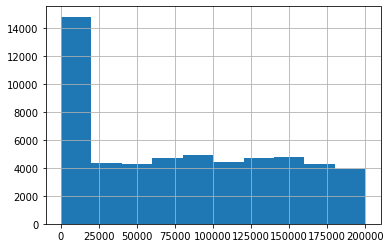

In [26]:
date = '2021-04-30'
df_[
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))&(df_.mileage<200000)].mileage.hist(bins=10)

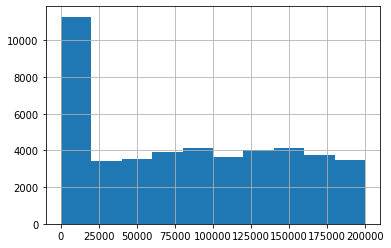

In [29]:
id_lst = set(df_m[
 (pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&(df_m.mileage<200000)].id)

df_[df_.id.isin(id_lst)].mileage.hist(bins=10)

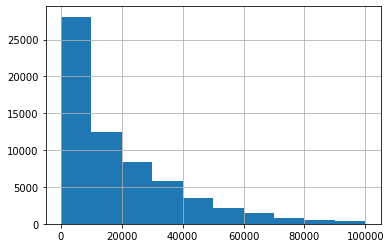

In [37]:
date = '2021-04-30'
df_[
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+timedelta(days=30))&(df_.price<100000)].price.hist(bins=10)

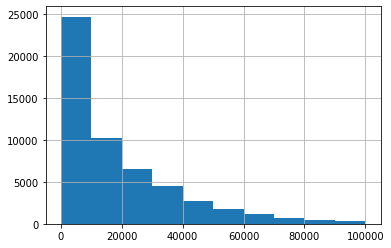

In [38]:
id_lst = set(df_m[
 (pd.to_datetime(df_m.created_date)>=pd.to_datetime(date))
    &(pd.to_datetime(df_m.created_date)<=pd.to_datetime(date)+timedelta(days=30))&(df_m.price_x<100000)].id)

df_[df_.id.isin(id_lst)].price.hist(bins=10)

In [34]:
df_m.price_x

0           34450.0
1           34450.0
2           34450.0
3           23900.0
4           23900.0
             ...   
47371035     9800.0
47371036     5400.0
47371037     5400.0
47371038     2600.0
47371039     2600.0
Name: price_x, Length: 47371040, dtype: float64

In [119]:
date = '2021-03-01'
q = df_mm[
 (pd.to_datetime(df_mm.created_date)>=pd.to_datetime(date))
    &(pd.to_datetime(df_mm.created_date)<=pd.to_datetime(date)+timedelta(days=30))
    &(pd.to_datetime(df_mm.date)<pd.to_datetime(date)+timedelta(days=60))
&(df_mm.price_x < 200000)]
z = q.groupby(['original_listing_id'])['leads_total','no_of_ga_unique_pdp_views'].sum().reset_index()
zz = z[z.no_of_ga_unique_pdp_views>=100]
zz['conversion_rate'] = zz.leads_total / zz.no_of_ga_unique_pdp_views
rr = pd.merge(df_, zz, left_on='id', right_on='original_listing_id')

In [120]:
rr[rr.conversion_rate>=0.01].price.quantile(0.5), rr[rr.conversion_rate>=0.01].price.quantile(0.75),  rr[rr.conversion_rate>=0.01].price.quantile(0.9)

(9400.0, 18990.0, 34900.0)

In [124]:
leads_id_lst = set(df_mm[
 (pd.to_datetime(df_mm.created_date)>=pd.to_datetime(date))
    &(pd.to_datetime(df_mm.created_date)<=pd.to_datetime(date)+timedelta(days=30))
    &(pd.to_datetime(df_mm.date)<pd.to_datetime(date)+timedelta(days=60))&(df_mm.leads_total>1)
&(df_mm.price_x < 200000)].original_listing_id)
ddd = df_[df_.id.isin(leads_id_lst)]


In [125]:
ddd.price.quantile(0.5), ddd.price.quantile(0.75), ddd.price.quantile(0.9)

(9500.0, 19900.0, 38900.0)

In [123]:
dd = df_[
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+
                                                           timedelta(days=30))&(df_.price<200000)]
dd.price.quantile(.50), dd.price.quantile(.75), dd.price.quantile(.90) 


(13950.0, 30000.0, 49900.0)

In [126]:
date = '2020-09-01'
q = df_mm[
 (pd.to_datetime(df_mm.created_date)>=pd.to_datetime(date))
    &(pd.to_datetime(df_mm.created_date)<=pd.to_datetime(date)+timedelta(days=30))
    &(pd.to_datetime(df_mm.date)<pd.to_datetime(date)+timedelta(days=60))
&(df_mm.price_x < 200000)]
z = q.groupby(['original_listing_id'])['leads_total','no_of_ga_unique_pdp_views'].sum().reset_index()
zz = z[z.no_of_ga_unique_pdp_views>=100]
zz['conversion_rate'] = zz.leads_total / zz.no_of_ga_unique_pdp_views
rr = pd.merge(df_, zz, left_on='id', right_on='original_listing_id')

In [127]:
rr[rr.conversion_rate>=0.01].price.quantile(0.5), rr[rr.conversion_rate>=0.01].price.quantile(0.75),  rr[rr.conversion_rate>=0.01].price.quantile(0.9)

(8500.0, 17600.0, 28750.0)

In [128]:
leads_id_lst = set(df_mm[
 (pd.to_datetime(df_mm.created_date)>=pd.to_datetime(date))
    &(pd.to_datetime(df_mm.created_date)<=pd.to_datetime(date)+timedelta(days=30))
    &(pd.to_datetime(df_mm.date)<pd.to_datetime(date)+timedelta(days=60))&(df_mm.leads_total>1)
&(df_mm.price_x < 200000)].original_listing_id)
ddd = df_[df_.id.isin(leads_id_lst)]


In [129]:
ddd.price.quantile(0.5), ddd.price.quantile(0.75), ddd.price.quantile(0.9)

(9900.0, 20500.0, 37982.0)

In [8]:
date = '2021-04-30'
dd = df_[
 (pd.to_datetime(df_.created_date)>=pd.to_datetime(date))&(pd.to_datetime(df_.created_date)<=pd.to_datetime(date)+
                                                           timedelta(days=30))&(df_.price<200000)]
dd.price.quantile(.50), dd.price.quantile(.75), dd.price.quantile(.90) 


(13500.0, 29900.0, 49900.0)

In [144]:
df_mm['created_year'] = df_mm.created_date.astype(str).str.slice(0,4)
df_mm['created_month'] = df_mm.created_date.astype(str).str.slice(5,7)

In [160]:
s = df_mm[df_mm.price_x<200000].groupby(['created_year', 'created_month', 'original_listing_id'])['leads_total','no_of_ga_unique_pdp_views'].sum().reset_index()
ss = s[s.no_of_ga_unique_pdp_views>=100]
ss['conversion_rate'] = ss.leads_total / ss.no_of_ga_unique_pdp_views
sss = pd.merge(df_, ss, left_on='id', right_on='original_listing_id')

In [196]:
# 50th Percentile
def quantile_50(x):
    return x.quantile(0.5)

def quantile_75(x):
    return x.quantile(0.75)

# 90th Percentile
def quantile_90(x):
    return x.quantile(0.9)

In [214]:
ssl = pd.merge(df_.drop(['created_year', 'created_month'], axis=1), s, left_on='id', right_on='original_listing_id')


In [229]:

sl = ssl[ssl.leads_total>1].groupby(['created_year', 'created_month']).agg({"price": [quantile_50, quantile_75, quantile_90]}).reset_index()
sl.columns = [' '.join(col).strip() for col in sl.columns.values]

In [230]:
sl = sl.rename(columns={'price quantile_50': 'price quantile_50_more1lead', 'price quantile_75': 'price quantile_75_more1lead', 'price quantile_90': 'price quantile_90_more1lead'})

In [220]:
sf = sss[sss.conversion_rate>=0.01].groupby(['created_year', 'created_month']).agg({"price": [quantile_50, quantile_75, quantile_90]}).reset_index()
sf.columns = [' '.join(col).strip() for col in sf.columns.values]

In [163]:
df_['created_year'] = df_.created_date.astype(str).str.slice(0,4)
df_['created_month'] = df_.created_date.astype(str).str.slice(5,7)

In [200]:
ssf = df_[df_.price<200000].groupby(['created_year', 'created_month']).agg({"price": [quantile_50, quantile_75, quantile_90]}).reset_index()
ssf.columns = [' '.join(col).strip() for col in ssf.columns.values]
ssf

,created_year,created_month,price quantile_50,price quantile_75,price quantile_90
0,2019,09,22700.0,36900.0,56900.0
1,2019,10,25500.0,40500.0,63290.0
2,2019,11,21496.0,35800.0,54900.0
3,2019,12,8500.0,20953.0,38800.0
4,2020,01,8900.0,23900.0,43250.9
5,2020,02,9900.0,24900.0,43890.0
6,2020,03,9900.0,25066.5,43990.0
7,2020,04,17500.0,34950.0,57900.0
8,2020,05,11900.0,26999.0,47500.0
9,2020,06,11800.0,26700.0,45989.8


In [201]:
xx = pd.merge(sf, ssf, on=['created_year', 'created_month'], suffixes=('high_conversion', 'all'))
xx['yearmonth'] = xx.created_year + xx.created_month

In [231]:
xxx = pd.merge(xx, sl, on=['created_year', 'created_month'])
xxx

,created_year,created_month,price quantile_50high_conversion,price quantile_75high_conversion,price quantile_90high_conversion,price quantile_50all,price quantile_75all,price quantile_90all,yearmonth,price quantile_50_more1lead,price quantile_75_more1lead,price quantile_90_more1lead
0,2019,09,39900.0,82600.00,111960.0,22700.0,36900.0,56900.0,201909,23800.0,56500.0,86920.0
1,2019,10,17900.0,38495.00,52360.0,25500.0,40500.0,63290.0,201910,26350.0,45475.0,75530.0
2,2019,11,5999.0,18900.00,31120.0,21496.0,35800.0,54900.0,201911,8100.0,24400.0,69210.0
3,2019,12,11900.0,23400.00,48180.0,8500.0,20953.0,38800.0,201912,29700.0,39900.0,64900.0
4,2020,01,9800.0,21990.00,42500.0,8900.0,23900.0,43250.9,202001,10850.0,27900.0,49700.0
5,2020,02,13400.0,29425.00,50770.0,9900.0,24900.0,43890.0,202002,11990.0,29825.0,55450.0
6,2020,03,11900.0,25625.00,58700.0,9900.0,25066.5,43990.0,202003,13850.0,29900.0,72600.0
7,2020,04,5900.0,10374.25,22190.0,17500.0,34950.0,57900.0,202004,8900.0,19250.0,44019.0
8,2020,05,11940.0,20662.50,35050.0,11900.0,26999.0,47500.0,202005,11900.0,25900.0,38600.0
9,2020,06,7499.0,16000.00,28100.0,11800.0,26700.0,45989.8,202006,9900.0,19922.5,34900.0


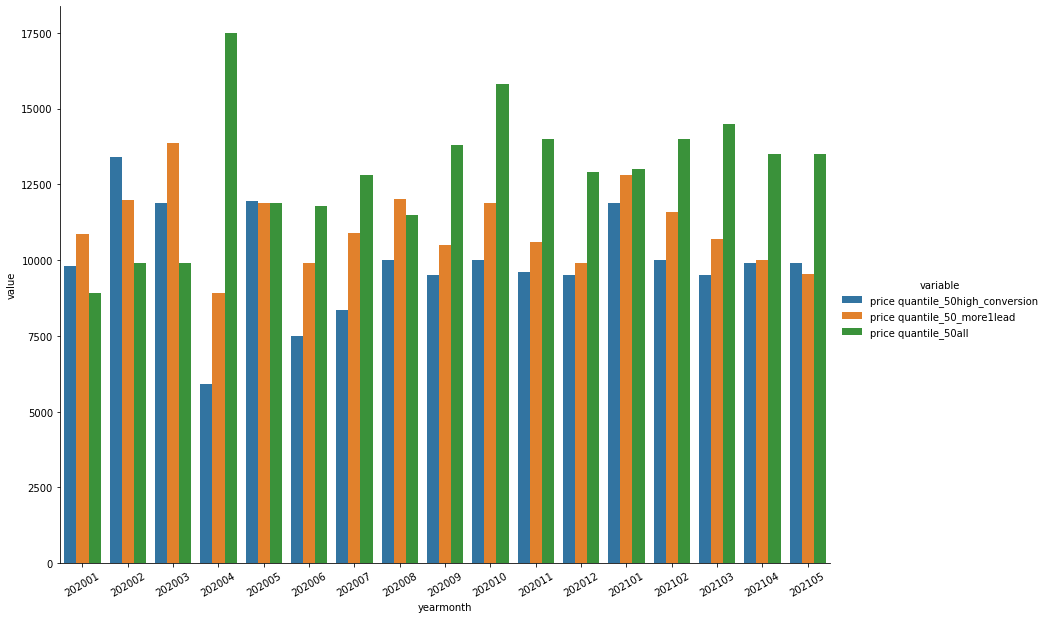

In [232]:
sns.catplot(data =pd.melt(xxx[xxx.created_year!='2019'][['price quantile_50high_conversion','price quantile_50_more1lead','price quantile_50all', 'yearmonth']], ['yearmonth']), x = 'yearmonth', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


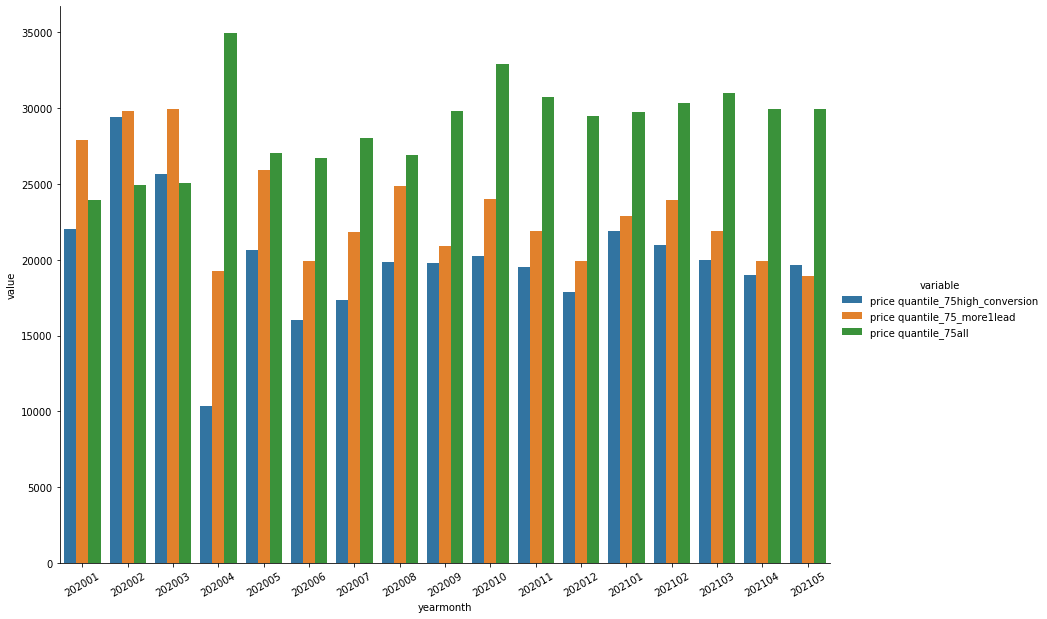

In [233]:
sns.catplot(data =pd.melt(xxx[xxx.created_year!='2019'][['price quantile_75high_conversion','price quantile_75_more1lead','price quantile_75all', 'yearmonth']], ['yearmonth']), x = 'yearmonth', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


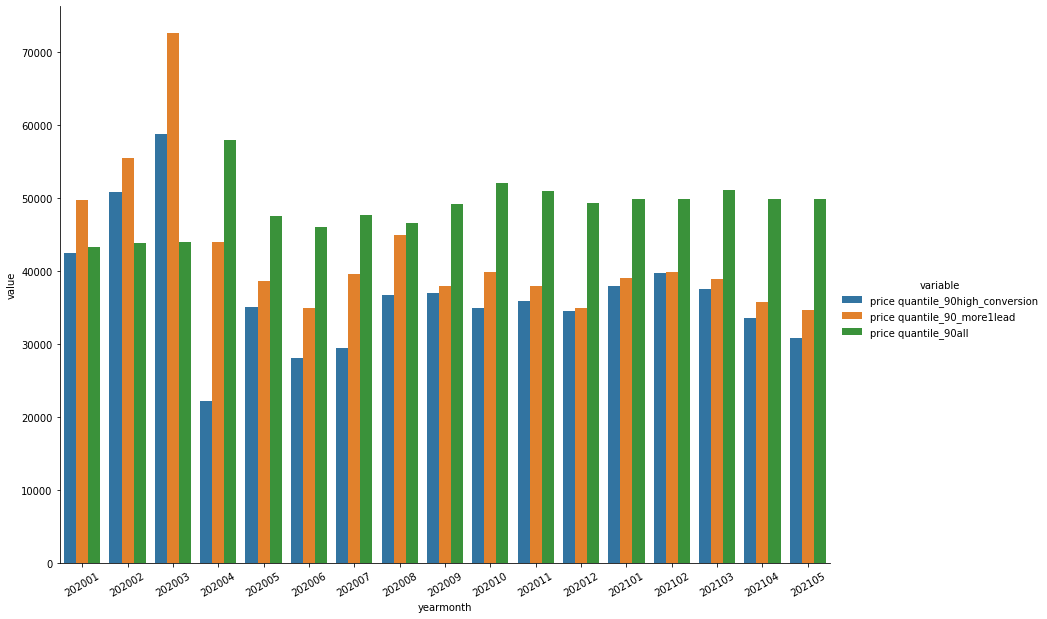

In [234]:
sns.catplot(data =pd.melt(xxx[xxx.created_year!='2019'][['price quantile_90high_conversion','price quantile_90_more1lead','price quantile_90all', 'yearmonth']], ['yearmonth']), x = 'yearmonth', y='value', hue = 'variable', kind = 'bar',height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=30);


In [236]:
xxx.to_csv('price_all_popular.csv')

In [ ]:
df_s = pd.read_csv('data/searches')
#df_s1 = pd.read_csv('data/searches_sepdec2020')
#df_s2 = pd.read_csv('data/searches_junaug2020')
#df_s3 = pd.read_csv('data/searches_marmay2020')
#df_s4 = pd.read_csv('data/searches_sepdec2019')